# InstaBot 2

#### Demo video link : https://youtu.be/0m8S54mRwrs

In [1]:
# Importing libraries and create webdriver
# There are two ways for doing same 

#######     First way  

# from selenium import webdriver
# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.chrome.service import Service as ChromeService
# driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))


########     Second way 
from selenium import webdriver

driver=webdriver.Chrome()

driver.maximize_window()

In [2]:
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
import time
wait=WebDriverWait(driver,10)

In [3]:
userName="SampleUsername"
paswrd="SamplePassword"

In [5]:
driver.get('https://www.instagram.com/')

In [6]:
# Login the account
def login(user_name,passw):
    try:
        # finding input box for username and fill it with value
        username_box=wait.until(EC.presence_of_element_located((By.NAME,'username')))
        username_box.send_keys(user_name)

        # finding input box for password and fill it with value

        password_box=driver.find_element(by="name",value="password")
        password_box.send_keys(passw)

        # finding login/submit button and click

        login_btn=wait.until(EC.presence_of_all_elements_located((By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div')))

        login_btn[0].submit()

        not_now=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_ac8f")))
        not_now.click()


        not_now=wait.until(EC.presence_of_element_located((By.CLASS_NAME,"_a9_1")))
        not_now.click()
    
    
    except TimeoutException:
        print('Sorry , something wrong happen ! Try again..')


In [7]:
login(userName,paswrd)

#### function for finding user name

In [8]:
def search_username(q):
    try:
        search_box = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,'svg.x1lliihq.x1n2onr6.x5n08af')))
        # we get manyobjects where 4th one is for opening search bar so click it
        search_box[2].click()

        #get the search box

        s_input=wait.until(EC.presence_of_element_located((By.TAG_NAME,"input")))
        s_input.send_keys(q)
        
        # fetching the usernames (avoiding hashtags)
    except TimeoutException :
        print('Sorry , something wrong happen ! Try again..')

### 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
1. From the list of instagram handles you obtained when you searched 'food' in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

#### Returning the top 10 food blogger id

In [9]:
def search_and_open_id(q):
    try:
        search_username(q)
        time.sleep(3)
        user_acc=wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,"span.x1lliihq.x1plvlek.xryxfnj.x1n2onr6.x193iq5w.xeuugli.x1fj9vlw.x13faqbe.x1vvkbs.x1s928wv.xhkezso.x1gmr53x.x1cpjm7i.x1fgarty.x1943h6x.x1i0vuye.xvs91rp.x1s688f.x5n08af.x10wh9bi.x1wdrske.x8viiok.x18hxmgj")))
        
        if q!="food": user_acc[0].click()
        else: user_acc[6].click()
        time.sleep(3)
    except TimeoutException :
        print('Sorry , something wrong happen ! Try again..')

In [12]:
def get_top_10_ids(quary):
    try:
        driver.get('https://www.instagram.com/')
        search_username(quary)
        span_element = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,"span.x1lliihq.x1plvlek.xryxfnj.x1n2onr6.x193iq5w.xeuugli.x1fj9vlw.x13faqbe.x1vvkbs.x1s928wv.xhkezso.x1gmr53x.x1cpjm7i.x1fgarty.x1943h6x.x1i0vuye.xvs91rp.x1s688f.x5n08af.x10wh9bi.x1wdrske.x8viiok.x18hxmgj")))
        k=0
        ids=[]
        for i in span_element:
            if k==10:break
            s=i.text
            if s[0]=="#":continue
            k+=1
            ids.append(s)
        return ids
    except TimeoutException:
        print('Sorry , something wrong happen ! Try again..')

In [13]:
top_10_ids=get_top_10_ids("food")

# printing

for i in top_10_ids:
    print(i)

food_delight03
food_and_the_foodies
food_lunatic
foodtalkindia
food_at_my_kitchen
food_columnist_
food
food.ie.me
dilsefoodie
khane_ka_khazana


In [14]:
from collections import OrderedDict 
def extract_number_of_followers(id_list):
    try:
        driver.get('https://www.instagram.com/')
        dct = {}
        for i in id_list :
            # Search Each id and open it 
            search_and_open_id(i)
            #locating followers of user
            followers = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME,'_ac2a')))[1]
            # Replacing ',' with '' and converted into int
            dct[i] = int(followers.get_attribute('title').replace(',' , ''))
            time.sleep(2)
            driver.back()
        #top 5 most followed user
        count = 0
        res = OrderedDict()
        for i in sorted(dct, key=dct.get, reverse=True):
            if(count == 5) : 
                break
            res[i] = dct[i]
            count += 1 
        return res
    except TimeoutException :
        print('Sorry , something wrong happen ! Try again..')

In [15]:
top_5_handles = (extract_number_of_followers(top_10_ids))

In [16]:
print('Top 5 instagram handles with highest number of followers..\n')
for uname in top_5_handles:
    print(uname,' '*(20-len(uname)),top_5_handles[uname])

Top 5 instagram handles with highest number of followers..

dilsefoodie           1199624
foodtalkindia         309246
food_lunatic          224363
food                  181832
food.ie.me            17152


2. Now Find the number of posts these handles have done in the previous 3 days.


In [70]:
#this function returns number of post posted by user in n days
from datetime import datetime, timedelta

def count_of_post(day):
    try :
        #locating first post
        first_post = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_aagw')))
        first_post.click()
        
        c = 0 
        while True :
            #get date time of the the uploaded post
            temp = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,'time._a9ze._a9zf')))
            
            # Here Date in string type 
            date_string = temp.get_attribute('datetime')
            
            #convert string into date format
            date = datetime.strptime(date_string[0:19], "%Y-%m-%dT%H:%M:%S")

            #Get the  differnce between today's date and post uploaded date
            if (datetime.now() - date).days > day :
                break
            else :
                c += 1
            
            # GO to next post
            next_button=driver.find_elements(By.CSS_SELECTOR,"svg.x1lliihq.x1n2onr6.x175jnsf")
            next_button[len(next_button)-1].click()
        #closing the post
        driver.back()
        return c
    
    except TimeoutException :
        print('Sorry , something wrong happen ! Try again..')

driver.get('https://www.instagram.com/')

In [ ]:
posts_in_3days = {}
j=0
for i in top_5_handles :
    if j==5:
        break
    j+=1
    search_and_open_id(i)
    time.sleep(2)
    count = count_of_post(3)
    posts_in_3days[i] = count


In [198]:
print('Total Number of posts top 5 food bloggers posted posts in 3 days. \n')

for i in posts_in_3days:
    print(i," "*(15-len(i)),posts_in_3days[i])

Total Number of posts top 5 food bloggers posted posts in 3 days. 

dilsefoodie      0
foodtalkindia    3
food_lunatic     3
food             0
food.ie.me       0


3. Depict this information using a suitable graph.

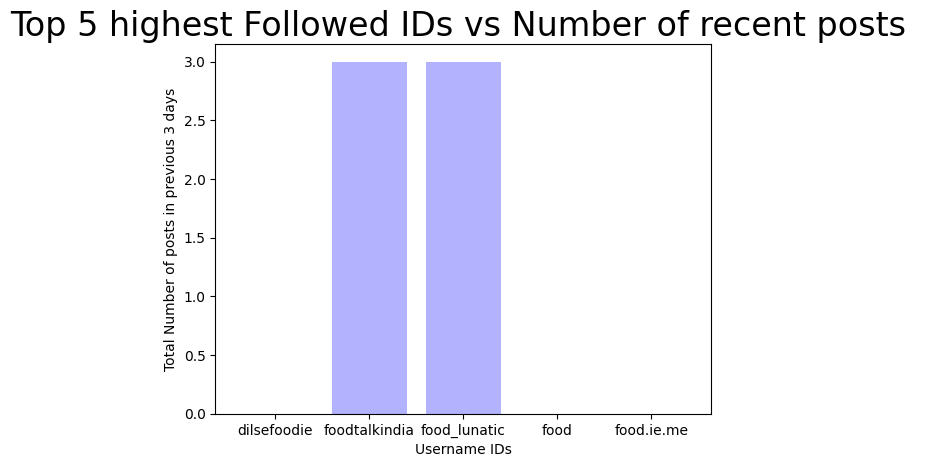

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = posts_in_3days.keys()
y = posts_in_3days.values()
plt.bar(x,y,color='blue',alpha=0.3)

plt.xlabel("Username IDs",size=10)
plt.ylabel("Total Number of posts in previous 3 days",size=10)

plt.title('Top 5 highest Followed IDs vs Number of recent posts ',fontsize=24, color='black')

plt.show()


# Second Problem 

1.Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.


In [200]:
def extract_hashtags(handle_list):
    try :
        hashtags = []
        for user in handle_list:
            search_and_open_id(user)
    
            #Scroll to load posts
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)

            #Getting list of posts on account

            posts = driver.find_elements(By.CLASS_NAME,'_aagw')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                #locating all hashtag used in this post
                hts=driver.find_elements(By.CSS_SELECTOR,"h1._ap3a._aaco._aacu._aacx._aad7._aade > a")
                for hashtag in hts:
                    #appending in list
                    hashtags.append(hashtag.text)  
                
                #locating close button and clicking on it
                driver.back()

        return hashtags
    
    except TimeoutException :
        print('Sorry , something wrong happen ! Try again..')


driver.get('https://www.instagram.com/')

In [201]:

all_hastags = extract_hashtags(top_5_handles)

In [202]:
#printing all Hastags collected from all 5 id's posts
for i in all_hastags:
    print(i)

#Ad
@kwalitywalls
#CraftedForIndulgence
#IceCream
#Hazelnuts
#Chocolate
#hazelnutchocolate
#dilsefoodie
@agraeaters
#dilsefoodie
#food
#streetfood
#cholekulche
@ministryofculturegoi
@amritmahotsav
#harghartiranga
#75For75
#amritmohatsav
#DilSeDesi
#dilsefoodie
@majestic_crown_banquet
#dilsefoodie
#food
#banquet
#westdelhi
#dilsefoodie
#food
#breakfast
#ghaziabad
@sandozamritsar
#dilsefoodie
#food
#sandwich
#streetfood
#dilsefoodie
#food
#omelette
#breakfast
@foodwalkwithsanju
#dilsefoodie
#food
#aloosabzi
#ghaziabad
#dilsefoodie
#food
#dinner
#dalfry
#lajpatnagar
#VeganEats
#Delhi
@ginexplorersclub
#GinOClock
#GinOClock
#ginexplorersclub
#GinOClock
#retroverse
#gin
#discover
#festival
@khhetofficial
#Newintown
#SmokeHousePizzeria
#BestPizzasinDelhi
#PizzasinDelhi
#vidaai
#indianwedding
#weddingseason
#love
#newlyweds
#bride
#fun
#korean
#recipe
#recipevideo
#koreanrecipes
#tasty
#cheesetteokbokki
#viral
#trending
#ramen
#asmr
#recipe
#recipevideo
#pannerrecipe
#restaurantstyle
#makhani

2.Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.


In [203]:
dict = {}
hastag_list = []
for word in all_hastags:
    dict[word] = dict.get(word,0) + 1
    
for i in sorted(dict, key=dict.get, reverse=True):
    hastag_list.append([i,dict[i]])
    print(i,dict[i])

#dishoftheday 10
#dilsefoodie 9
#food 9
#trending 9
#streetfood 8
#discover 8
#foodieme 7
#foodphotography 7
#vegetarianfood 7
#foodoftheworld 7
#yougottaeatthis 7
#nomnom 7
#explore 7
#explorepageready 7
#recipe 6
#love 5
#recipevideo 5
#foodie 5
#healthy 5
#vegrecipes 5
#tasty 4
#recipes 4
#easyrecipes 4
#GinOClock 3
#weddingseason 3
#TheFlavourTrailBySwani 3
#TFT 3
#organic 3
#spices 3
#organicspices 3
#flavoursofindia 3
#instafood 3
#instagood 3
#instagram 3
#recipeoftheday 3
#trendingreels 3
#breakfastideas 3
#mealprep 3
#breakfast 2
#ghaziabad 2
#bride 2
#asmr 2
#sissu 2
#himachal 2
#snowfall 2
#travel 2
#winterrecipes 2
@anandadairy 2
#cousins 2
#doritos 2
#spicy 2
#newyorkcity 2
#pasta 2
#italian 2
#italianfood 2
#restaurantindustry 2
#resy 2
#taylorswift 2
#swifties 2
#indianfood 2
@moksa.co.in 2
#indianbreakfast 2
#teatime 2
#millet 2
#Ad 1
@kwalitywalls 1
#CraftedForIndulgence 1
#IceCream 1
#Hazelnuts 1
#Chocolate 1
#hazelnutchocolate 1
@agraeaters 1
#cholekulche 1
@ministry

3.Create a csv file with two columns : the word and its frequency


In [204]:
df = pd.DataFrame(hastag_list,columns=['Hastags','Frequency'])
df.to_csv('Hastags_frequency.csv',index=False)
df.head(10)

,Hastags,Frequency
0,#dishoftheday,10
1,#dilsefoodie,9
2,#food,9
3,#trending,9
4,#streetfood,8
5,#discover,8
6,#foodieme,7
7,#foodphotography,7
8,#vegetarianfood,7
9,#foodoftheworld,7


4. find the hashtags that were most popular among these bloggers


In [205]:
print(hastag_list[0][0])

#dishoftheday


5.Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

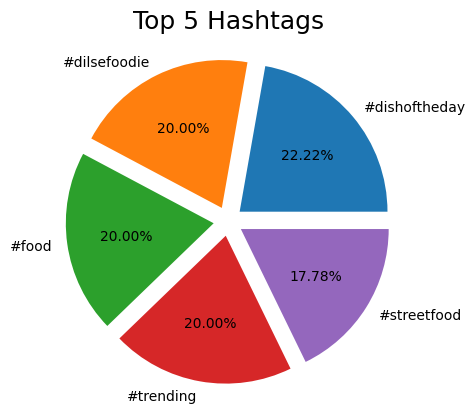

In [206]:
#using answer of problem 2.2

hastag_name=[]
count=[]
k=0
for i in hastag_list:
    if k==5:
        break
    k+=1
    hastag_name.append(i[0])
    count.append(i[1])

ex=[0.1,0.1,0.1,0.1,0.1]
plt.pie(count,labels=hastag_name,autopct='%0.2f%%',explode=ex)
plt.title('Top 5 Hashtags',fontsize=18, color='black')
plt.show()

# Third problem 

1.Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [51]:
#This function returns list of likes of 10 post of a user
def find_number_of_likes(user):
    try :
            driver.get('https://www.instagram.com/')
            #This fuction will search a user and open that profile
            search_and_open_id(user)
        
            driver.execute_script('window.scrollTo(0, 3000);')
            time.sleep(2)
            driver.execute_script('window.scrollTo(0, -3000);')
            time.sleep(2)
            total_likes = []
    
            # Get all posts present on page
            posts = driver.find_elements(By.CLASS_NAME,'_aagw')
            for post in posts[:10]:
                post.click()
                time.sleep(2)
                try:
                    like_text=wait.until(EC.presence_of_element_located((By.CSS_SELECTOR,"section._ae5m._ae5n._ae5o")))
                    like_text=like_text.text.split()
                    number_of_like=like_text[0].replace(",","")
                    if(number_of_like!="Liked"):
                        number_of_like=int(number_of_like)
                        total_likes.append(number_of_like)
                    else:
                        other_button=driver.find_element(By.LINK_TEXT,"others")
                        other_button.click()
                        time.sleep(2)
                        pop_up_body = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,"div.x9f619.xjbqb8w.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.x1n2onr6.x6ikm8r.x10wlt62.x1iyjqo2.x2lwn1j.xeuugli.xdt5ytf.xqjyukv.x1qjc9v5.x1oa3qoh.x1nhvcw1 >div")))[1]
                        total=0
                        for i in range(15):
                            driver.execute_script('arguments[0].scrollTop = arguments[0].scrollTop + arguments[0].offsetHeight;', pop_up_body)
                            follower_profile=driver.find_elements(By.CSS_SELECTOR,"button._acan._acap._acas._aj1-._ap30")
                            total+=len(follower_profile)
                            time.sleep(1)
                        total_likes.append(total)
                except TimeoutException:
                    other_button=driver.find_element(By.LINK_TEXT,"others")
                    other_button.click()
                    time.sleep(2)
                    pop_up_body = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,"div.x9f619.xjbqb8w.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.x1n2onr6.x6ikm8r.x10wlt62.x1iyjqo2.x2lwn1j.xeuugli.xdt5ytf.xqjyukv.x1qjc9v5.x1oa3qoh.x1nhvcw1 >div")))[1]

                    total=0
                    for i in range(15):
                        driver.execute_script('arguments[0].scrollTop = arguments[0].scrollTop + arguments[0].offsetHeight;', pop_up_body)
                        follower_profile=driver.find_elements(By.CSS_SELECTOR,"button._acan._acap._acas._aj1-._ap30")
                        total+=len(follower_profile)
                        time.sleep(1)
                    total_likes.append(total)
                driver.back()
                time.sleep(1)

                                
            return total_likes
    
    except TimeoutException :
        print('Sorry , something wrong happen ! Try again..')

In [53]:
handle_likes = {} #this will store username with list of likes 

for user in top_5_handles:
    likes = find_number_of_likes(user)
    handle_likes[user] = likes
    print('Number of likes of the top 10 posts of',user,'\n')
    for i in likes :
        print('Likes -',i)
    print()

Number of likes of the top 10 posts of dilsefoodie 

Likes - 204403
Likes - 283414
Likes - 10509
Likes - 7257
Likes - 8980
Likes - 6017
Likes - 3625
Likes - 2692
Likes - 4445
Likes - 6084

Number of likes of the top 10 posts of foodtalkindia 

Likes - 104
Likes - 408
Likes - 194
Likes - 48
Likes - 580
Likes - 28
Likes - 646
Likes - 136
Likes - 403
Likes - 84

Number of likes of the top 10 posts of food_lunatic 

Likes - 701
Likes - 2824
Likes - 1423
Likes - 2811
Likes - 1051
Likes - 7216
Likes - 1112
Likes - 798
Likes - 2805
Likes - 889

Number of likes of the top 10 posts of food 

Likes - 239
Likes - 269
Likes - 268
Likes - 269
Likes - 263
Likes - 269
Likes - 267
Likes - 269
Likes - 269
Likes - 262

Number of likes of the top 10 posts of food.ie.me 

Likes - 158
Likes - 269
Likes - 330
Likes - 269
Likes - 268
Likes - 263
Likes - 216
Likes - 269
Likes - 246
Likes - 268



2.Calculate the average likes for a handle.

In [54]:
avg_likes = {}
for key,val in handle_likes.items():
    avg = sum(val) // 10
    avg_likes[key] = avg

In [55]:
print('Top 5 handles and they avarages:- \n')
for user,likes in avg_likes.items():
    print(user,(20-len(user))* ' ', likes)

Top 5 handles and they avarages:- 

dilsefoodie           53742
foodtalkindia         263
food_lunatic          2163
food                  264
food.ie.me            255


3.Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [56]:
handles_names = list(top_5_handles.keys())

follower_likes={}

for i in range(5):
    follower_likes[handles_names[i]]=top_5_handles[handles_names[i]]//avg_likes[handles_names[i]]


print("Top 5 handle's average followers:like ratio of each handle \n")

for user,ratio in follower_likes.items():
    print(user," "*(15-len(user)),':  ', ratio)

Top 5 handle's average followers:like ratio of each handle 

dilsefoodie      :   22
foodtalkindia    :   1175
food_lunatic     :   103
food             :   688
food.ie.me       :   67


4.Create a bar graph to depict the above obtained information.

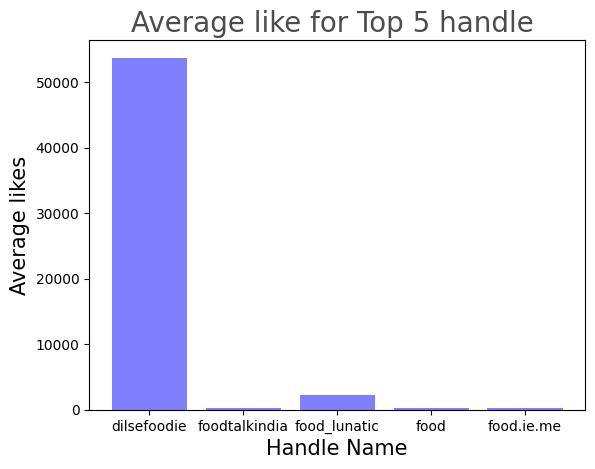

In [59]:

username = list(avg_likes.keys())
avg_like = list(avg_likes.values())

plt.bar(username,avg_like,color='blue',alpha=0.5)
plt.title('Average like for Top 5 handle ',fontsize=20, color='black',alpha=0.7)

plt.ylabel("Average likes",size=15)
plt.xlabel("Handle Name",size=15)

plt.show()

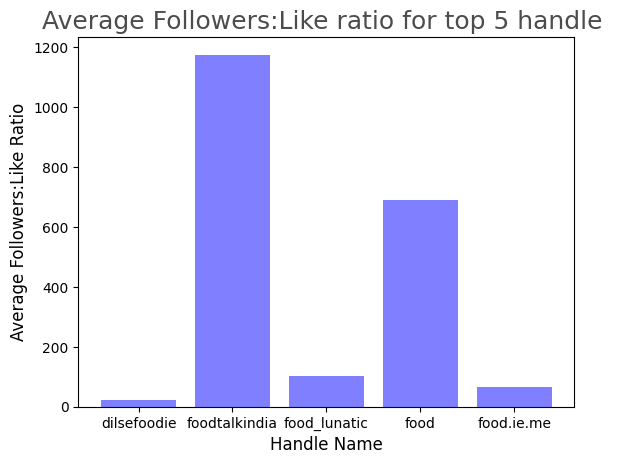

In [60]:
username = list(follower_likes.keys())
avg_like = list(follower_likes.values())

plt.bar(username,avg_like,color='blue',alpha=0.5)
plt.ylabel("Average Followers:Like Ratio",size=12)
plt.xlabel("Handle Name",size=12)
plt.title('Average Followers:Like ratio for top 5 handle ',fontsize=18, color='black',alpha=0.7)
plt.show()